In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Importing csv files

In [3]:
%%time
ign = pd.read_csv("data/ign_data/ign.csv")

CPU times: user 52.7 ms, sys: 9.62 ms, total: 62.3 ms
Wall time: 62 ms


In [4]:
vgs = pd.read_csv("data/ign_data/vgsales.csv")

In [5]:
# Analysing data format and types

In [6]:
ign.head(3)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12


In [7]:
%%time
ign_2 = pd.read_csv("data/ign_data/ign.csv", index_col=0)

CPU times: user 49.7 ms, sys: 8.82 ms, total: 58.5 ms
Wall time: 57.1 ms


In [8]:
ign_2.head(3)

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12


In [9]:
ign.shape

(18625, 11)

In [10]:
ign.describe()

,Unnamed: 0,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.000000,18625.00000,18625.000000
mean,9312.000000,6.950459,2006.515329,7.13847,15.603866
std,5376.718717,1.711736,4.587529,3.47671,8.690128
min,0.000000,0.500000,1970.000000,1.00000,1.000000
25%,4656.000000,6.000000,2003.000000,4.00000,8.000000
50%,9312.000000,7.300000,2007.000000,8.00000,16.000000
75%,13968.000000,8.200000,2010.000000,10.00000,23.000000
max,18624.000000,10.000000,2016.000000,12.00000,31.000000


In [11]:
ign.dtypes

Unnamed: 0          int64
score_phrase       object
title              object
url                object
platform           object
score             float64
genre              object
editors_choice     object
release_year        int64
release_month       int64
release_day         int64
dtype: object

In [12]:
# Questions to be answered

### What's the first game ever reviewed?

In [13]:
ign.sort_values(by="release_year").head(1)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
516,516,Great,The Walking Dead: The Game -- Episode 1: A New...,/games/the-walking-dead-season-1-episode-1/xbo...,Xbox 360,8.5,Adventure,N,1970,1,1


### How do average game reviews change year after year?

In [14]:
game_freq_g5 = ign.groupby('title').filter(lambda x:len(x) > 5)

In [15]:
game_score_year = game_freq_g5.pivot_table(index='title', columns='release_year', values='score')
game_score_year.fillna('-')

release_year,1997,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
title,,,,,,,,,,,,,,,,,
2006 FIFA World Cup,-,-,-,-,-,-,-,-,7.8375,-,-,-,-,-,-,-,-
Assassin's Creed IV: Black Flag,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,8.5,-
Avatar: The Game,-,-,-,-,-,-,-,-,-,-,-,6.82,6.5,-,-,-,-
Avatar: The Last Airbender,-,-,-,-,-,-,-,-,5.5,5,-,-,-,-,-,-,-
Big Mutha Truckers,-,-,-,-,-,6.05,-,-,5.5,-,-,-,-,-,-,-,-
Brain Challenge,-,-,-,-,-,-,-,-,8.3,8,7.46,7.2,-,-,-,-,-
Call of Duty 3,-,-,-,-,-,-,-,-,8.22,7.5,-,-,-,-,-,-,-
Call of Duty: Ghosts,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,8.8,-
Call of Duty: World at War,-,-,-,-,-,-,-,-,-,-,8.4,-,-,-,-,-,-


In [16]:
ratings_year = ign.groupby(['release_year'])['score'].mean()
ratings_year

release_year
1970    8.500000
1996    6.161745
1997    6.566341
1998    6.930678
1999    6.983484
2000    6.693589
2001    7.120494
2002    6.978526
2003    7.198246
2004    7.170712
2005    7.222426
2006    6.732864
2007    6.632547
2008    6.448146
2009    6.840368
2010    6.932869
2011    7.050326
2012    7.418327
2013    7.460489
2014    7.467598
2015    7.659452
2016    7.573451
Name: score, dtype: float64

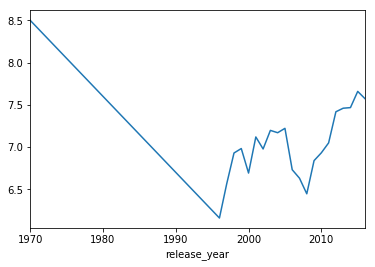

In [17]:
ratings_year.plot()

### What are the platforms with the average highest/lowest review scores?

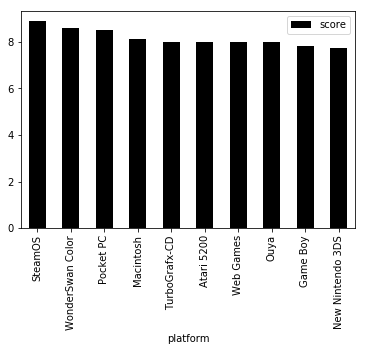

In [18]:
platform_byscore = ign.pivot_table(index='platform', values='score', aggfunc='mean')
platform_byscore.sort_values('score', ascending=False).head(10).plot(kind='bar', color=['k'])

### Are highly rated games released at a certain time of year?

In [19]:
blockbusters = ign[ign['score_phrase'] == 'Amazing']
blockbusters.head(5)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
7,7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
13,13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


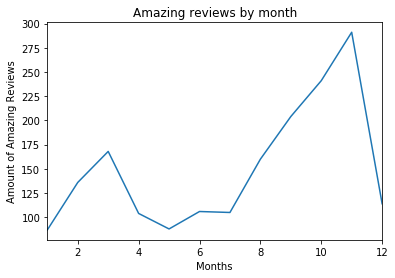

In [20]:
blockbuster_month = blockbusters.groupby('release_month').count()

gr = blockbuster_month['score_phrase'].plot(title='Amazing reviews by month')
gr.set_xlabel("Months")
gr.set_ylabel("Amount of Amazing Reviews")

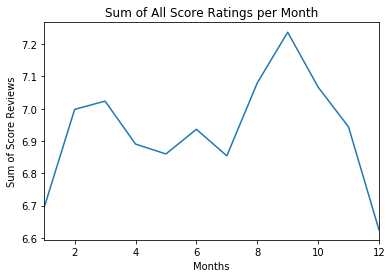

In [21]:
blockbuster_2t_month = ign.groupby('release_month').mean()

gr = blockbuster_2t_month['score'].plot(title='Sum of All Score Ratings per Month')
gr.set_xlabel("Months")
gr.set_ylabel("Sum of Score Reviews")